# Taxi data highlights -- as text processing 

Spring 2017 - Prof. Foster Provost

Teacher Assistant: Maria L Zamora Maass

***

This notebook helps to see some examples of the code that the students developed for the analysis of the taxi data for homework 1 ... and more! Recall that homework 1 involved a sample of NYC taxi records, used to help gain experience with data frames and ipython notebooks. In particular, students were asked to take a sample of the data set and find patterns related to dropoffs and date-time of the trips.

What did they do?  What did they say? 

Which basic python commands did they use?

*** 




## Clean the patterns file

The patterns students found are stored in a text-file called "patterns_hw.txt". 

***
Let's run the following cell and then see: 

What does each line is doing? 

Why do we need to reset the index? 

Why do we need to drop duplicates? 





In [1]:

import pandas as pd
pd.options.display.max_colwidth = 500

patterns = pd.read_table("data/patterns_hw.txt", sep='\|', header=None,index_col=1,names=["Texts"],engine='python')


###### Each of the following lines could be commented (one at a time) to see the effect

patterns.reset_index(drop=True,inplace=True)
patterns.drop_duplicates(inplace=True)
patterns.dropna(inplace=True)
patterns.replace(regex="#",value="comment: ",inplace=True)
patterns.replace(regex="code:",value="code: ",inplace=True)

patterns.head(10)


,Texts
0,comment: The only pattern I can see from the random sample of 20 rides is the rides that occurred later into the evening had more passengers as compared to rides during the day.
2,code: df1.corr()
4,code: np.unique(trips['dropoff_borough'])
6,comment: Pattern found: 1. The dropoff borough is always brooklyn. The correlation value for dropoff borough is always NaN which indicates
7,comment: that the standard deviation of dropoff borough is zero which means it has the same value.
8,comment: 2. The correlation value between dropoff zipcode and dropoff datetime is 0.985 which means dropoff zipcode and dropoff datetime
9,comment: are almost linearly dependent on each other.
11,code: sample_df.dropoff_datetime.unique()
13,comment: Drop-offs occured between 3/1/15 - 3/29/15
14,comment: Most drop-offs occur between hours of 17:00:00 - 23:00:00


## Extract information about the code used

Now we can use **substrings** to find all lines related to 'comments' or 'code'.
This is the same idea as regex or filter.


In [2]:

code_patterns = patterns[ patterns['Texts'].str.contains('code:') ]
text_patterns = patterns[ patterns['Texts'].str.contains('comment:') ]

text_patterns


,Texts
0,comment: The only pattern I can see from the random sample of 20 rides is the rides that occurred later into the evening had more passengers as compared to rides during the day.
6,comment: Pattern found: 1. The dropoff borough is always brooklyn. The correlation value for dropoff borough is always NaN which indicates
7,comment: that the standard deviation of dropoff borough is zero which means it has the same value.
8,comment: 2. The correlation value between dropoff zipcode and dropoff datetime is 0.985 which means dropoff zipcode and dropoff datetime
9,comment: are almost linearly dependent on each other.
13,comment: Drop-offs occured between 3/1/15 - 3/29/15
14,comment: Most drop-offs occur between hours of 17:00:00 - 23:00:00
16,comment: The dropoff borough is either Brooklyn or None.
20,comment: patterns identified
21,comment: the dropoff borough is always brooklyn


** Learn how to export your data ! **

In [3]:
import os
try: os.remove('data/code.txt')
except: None
try: os.remove('data/texts.txt')
except: None
    
code_patterns.to_csv(r'data/code.txt', header=None, index=None, sep=' ', mode='a')
text_patterns.to_csv(r'data/texts.txt', header=None, index=None, sep=' ', mode='a')



### World cloud generator !    

A fun way to visualize which are the most common words/code used with a 'word cloud'.

The github repo of _wordcloud_ has more details about this library. [Github link](https://github.com/amueller/word_cloud)

***

For this task we want to remove words that are not relevant--such words are called **"STOPWORDS"**. Normally stopwords are common words (frequently used) mainly for grammatical or discourse purposes, rather than for content purposes. So for example, the words 'the', 'and', 'of', and 'on' are considered stopwords since they are very common in English (we can consider a list of stopwords for any other language as well). 

*Note that what words you would use as stopwords of course depends on the task!  In your business understanding/data understanding you would think through the appropriate stopword definition, rather than just using some common dictionary.  As an example, if you were doing author identification for anonymous writing, you likely **would** want to include a lot of discourse words, as people tend to have "signatures" in the words they use.  After reading the class text, you probably would be much better able to identify something that Tom and Foster wrote.  "It turns out" that each of us has a signature in our writing.  If you scrutinized the text carefully, you might even be able to figure out parts that are written by the different authors, simply based on style*

Nonetheless, for this exercise, we can start our set of _stopwords_ with one built-in set provided by the _wordcloud_ library (and there are other libraries with their own lists too). Then, we'll add to the set any unnecessary words we might decide on for our specific problem (e.g. we'll drop "dropoff_datetime" because it's obvious that all of you should have used this word in your code or comments).


In [4]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

print (STOPWORDS)

set(['', 'all', "she'll", 'just', "don't", 'being', 'over', 'through', 'yourselves', 'its', 'before', "he's", "when's", "we've", 'had', 'should', "he'd", 'to', 'only', "there's", 'those', 'under', 'ours', 'has', "haven't", 'do', 'them', 'his', "they'll", 'get', 'very', "who's", "they'd", 'cannot', "you've", 'they', 'not', 'during', 'yourself', 'him', 'nor', "we'll", 'like', 'did', "they've", 'this', 'she', 'each', "won't", 'where', "mustn't", "isn't", "i'll", "why's", 'www', 'because', "you'd", 'doing', 'some', 'up', 'are', 'further', 'ourselves', 'out', 'what', 'for', 'while', "wasn't", 'does', "shouldn't", 'above', 'between', 'ought', 'be', 'we', 'who', "you're", 'were', 'here', 'hers', "aren't", 'by', 'both', 'about', 'would', 'of', 'could', 'against', "i'd", "weren't", "i'm", 'com', 'or', "can't", 'own', 'into', 'whom', 'down', "hadn't", "couldn't", 'your', "doesn't", 'from', "how's", 'her', 'their', "it's", 'there', 'been', 'why', 'few', 'too', 'themselves', 'was', 'until', 'more'

In [5]:

# Use stop words
stopwords = set(STOPWORDS)
stopwords.add("code")
stopwords.add("comment")
stopwords.add("trips")
stopwords.add("dropoff")
stopwords.add("dropoff_datetime'")
stopwords.add("dropoff_zip_code'")
stopwords.add("pattern")
stopwords.add("pd")
stopwords.add("sample")
stopwords.add("to_datetime")
stopwords.add("one")
stopwords.add("df2")


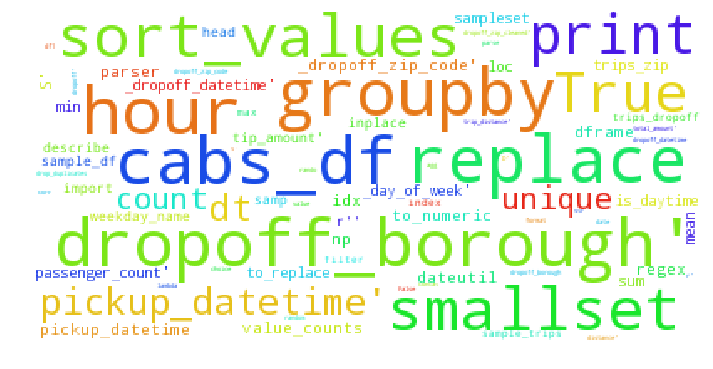

In [6]:

# Create the cloud
worldcloud_create = WordCloud(background_color="white",max_words=5000,stopwords=stopwords)
code_text = open('data/code.txt').read()
worldcloud_create.generate(code_text)

# Display results
%matplotlib inline
plt.figure(figsize = (12,7))
plt.imshow(worldcloud_create)
plt.axis("off")
plt.show()


** You can also use a mask to display results:  http://www.stencilry.org/stencils/ **

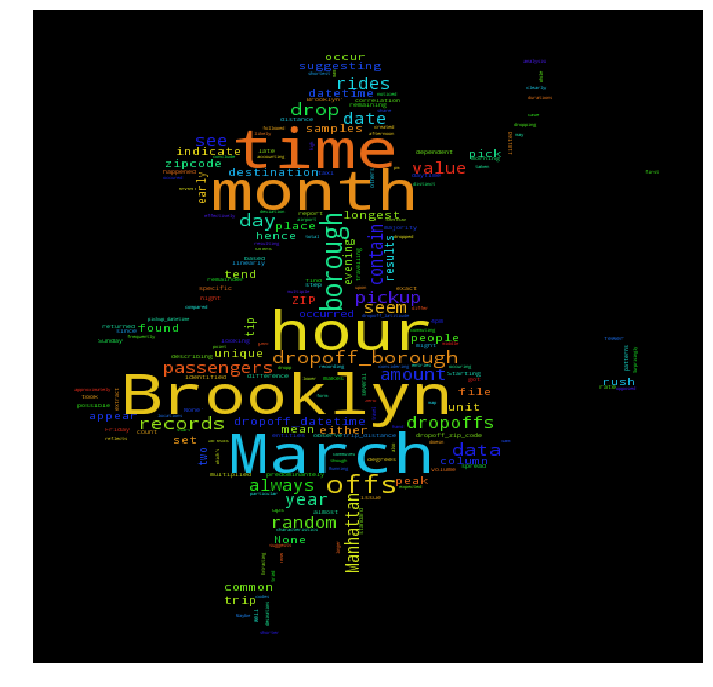

In [7]:

pp_mask = np.array(Image.open("data/pp.jpg"))


# Create the cloud
worldcloud_create = WordCloud(background_color="black", mask=pp_mask,
               stopwords=stopwords)
code_text = open('data/texts.txt').read()
worldcloud_create.generate(code_text)

# Display results
%matplotlib inline
plt.figure(figsize = (12,12))
plt.imshow(worldcloud_create,aspect='auto')
plt.axis("off")
plt.show()

